### Attributes

- Customer Details

    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained, 0 otherwise 
    
    
    
- Products

    - MntWines: Amount spent on wine
    - MntFruits: Amount spent on fruits 
    - MntMeatProducts: Amount spent on meat 
    - MntFishProducts: Amount spent on fish 
    - MntSweetProducts: Amount spent on sweets 
    - MntGoldProds: Amount spent on gold 


- Promotion

    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


- Place

    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month
    
    
- Target

    - Need to perform clustering to summarize customer segments.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#To make sure that plots are rendered correctly in jupyter notebooks.

# Importing the Data 

In [2]:
# Load the Data
df=pd.read_excel(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\supermarket_marketing_campaign.xlsx")

In [3]:
print("The shape of the data is,", df.shape)

The shape of the data is, (2240, 29)


# Setting Display 

In [4]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
# Drop ID Feature from the dataset
df=df.drop(['ID'],axis=1)

In [8]:
# Data type of each column
data_types=pd.DataFrame(df.dtypes,columns=['Data_Type'])
data_types

,Data_Type
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64
MntFruits,int64


# Quality Analysis of the data

## Check for Missing Values and Duplicates in dataset

In [9]:
# To check the percentage of nan values present in each feature
print("The number of null values in the complete dataset is", df.isnull().sum().sum())


# List of features which has missing values
features_nan=[features for features in df.columns if df[features].isnull().sum()>=1]

# The features with missing values and its percentage 
for feature in features_nan:
    print("The feature",feature, "has", np.round(df[feature].isnull().mean(), 2),'% missing values.')

The number of null values in the complete dataset is 24
The feature Income has 0.01 % missing values.


In [10]:
# replacing null values in 'Income' column with mean
for i in df.columns[df.isnull().any(axis=0)]:     # Applying Only on variables with NaN values
    df[i].fillna(df[i].mean(),inplace=True)

In [11]:
# To check the duplicates in the dataset
print("The number of duplicated rows in the dataset is", df.duplicated().sum())

The number of duplicated rows in the dataset is 182


In [12]:
# Dropping the duplicates
df.drop_duplicates(keep='first', inplace=True, ignore_index=False, subset=None)

In [13]:
df.shape

(2058, 28)

# Build Derived Features - Customer Age and Tenure

In [14]:
import datetime
reference_date=datetime.datetime(2021,1,1)
print(reference_date)

df['Year_Birth']=pd.to_datetime(df['Year_Birth'], format='%Y')
df['Age'] = (reference_date- df['Year_Birth']).astype('timedelta64[Y]')

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Cust_Tenure'] = (reference_date- df['Dt_Customer']).astype('timedelta64[Y]')

df=df.drop(['Year_Birth','Dt_Customer'],axis=1)

df[['Age','Cust_Tenure']].head()

2021-01-01 00:00:00


,Age,Cust_Tenure
0,64.0,8.0
1,67.0,6.0
2,56.0,7.0
3,37.0,6.0
4,40.0,6.0


In [15]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data.shape, categorical_data.shape

((2058, 26), (2058, 2))

# Event Rate

In [16]:
print("The reponse rate for the event is", round(df['Response'].mean()*100, 2),"%")

The reponse rate for the event is 15.21 %


# The Categorical Features

In [17]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Education', 'Marital_Status']

In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Education and number of categories are 5
The feature is Marital_Status and number of categories are 8


In [19]:
# The categorical variables and each of its unique values
count = 0
categorical_features = []
for col in df.select_dtypes(include='object').columns:
    categorical_features.append(col)
    count+=1
    print(count, col, "-", df[col].unique())
    print()

1 Education - ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

2 Marital_Status - ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']



In [20]:
df['Marital_Status'].value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

- For 'Marital_Status', we combine distinct values approriately to reduce the unique levels in the column 

In [21]:
def living_status(value):
    if value in ['Absurd', 'YOLO','Single', 'Alone']:
        return 'Single'
    
    elif value in ['Together', 'Married']:
        return 'Couple'
    
    else:
        return value

In [22]:
df['Marital_Status'] = df['Marital_Status'].apply(living_status)
df['Marital_Status'].value_counts()

Couple      1316
Single       455
Divorced     216
Widow         71
Name: Marital_Status, dtype: int64

# The Numerical Features
### The 2 types of numerical variables are, Continous variables and Discrete Variables

#### Vizualization using Scatter Plots

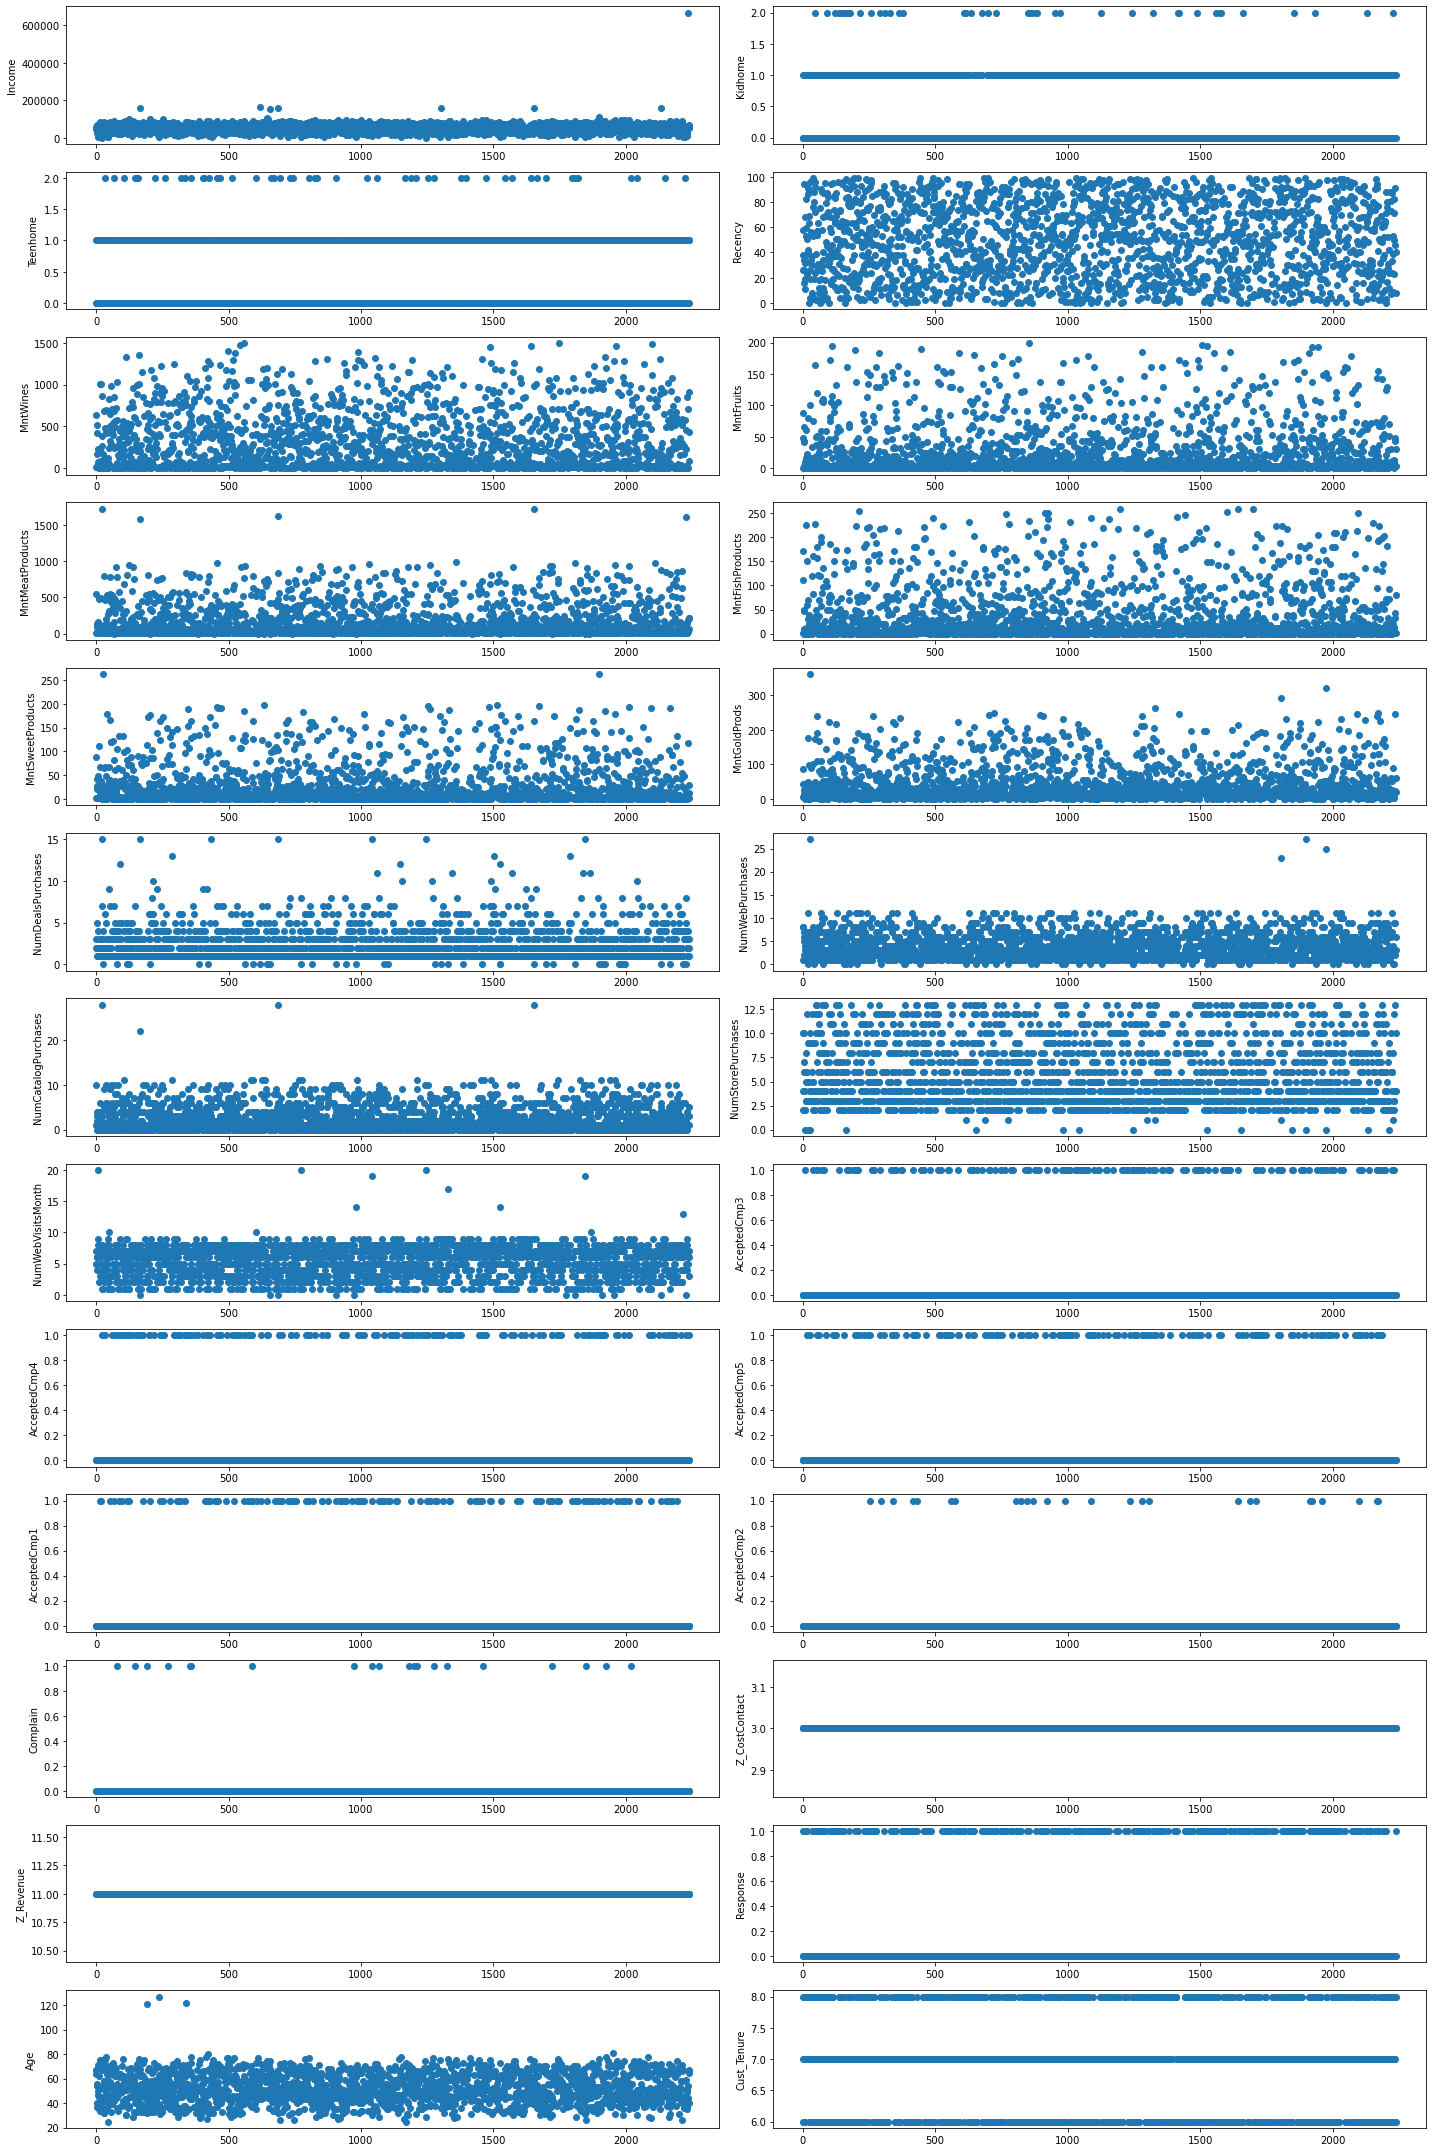

In [23]:
# Visualizing numeric columns  
# Using Scatter plot
numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 13
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,30))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        fig.tight_layout()

plt.show()

### From our plots, we can see that, 'Z_Revenue' and 'Z_CostContact' features are constant values. Hence we drop it.

In [24]:
df['Z_Revenue'].value_counts()

11    2058
Name: Z_Revenue, dtype: int64

In [25]:
df['Z_CostContact'].value_counts()

3    2058
Name: Z_CostContact, dtype: int64

In [26]:
df = df.drop(['Z_Revenue', 'Z_CostContact'], axis=1)


## Outlier Analysis of Numerical Features

### Outlier : From our earlier analysis of vizualization of Scatter Plots, we can seet that, there are outliers in income and age feature

In [27]:
df[['Age']].nlargest(3,df[['Age']])

,Age
239,127.0
339,122.0
192,121.0


In [28]:
df['Income'].max()

666666.0

# Capping Outliers

In [29]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [30]:
outlier_features = ['Income', 'Age']

In [31]:
df[outlier_features]=df[outlier_features].apply(lambda x : outlier_cap(x))
df[outlier_features].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.99])

,Income,Age
count,2058.000000,2058.000000
mean,51830.423777,52.129738
std,20642.990466,11.664037
min,1730.000000,25.000000
1%,7500.000000,29.000000
5%,19089.150000,33.000000
10%,24318.900000,37.000000
25%,35701.750000,44.000000
50%,52054.000000,51.000000
75%,68242.500000,62.000000


- Combining 'Kidhome', 'Teenhome' features together to create a feature 'childhome' with the total number of children

In [32]:
df['childhome'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

In [33]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('The number of numerical variables are: ', len(numerical_features))

The number of numerical variables are:  23


## Discrete  Numerical Features

In [34]:
# Discrete Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print("Discrete Feature Count: {}".format(len(discrete_feature)))

Discrete Feature Count: 14


## Continous Numerical Features

In [35]:
#Continous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Feature Count: {}".format(len(continuous_feature)))

Continuous Feature Count: 9


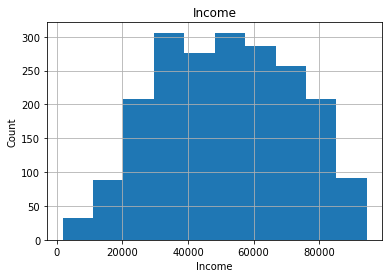

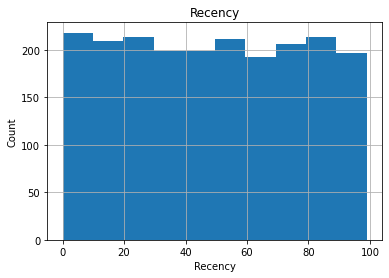

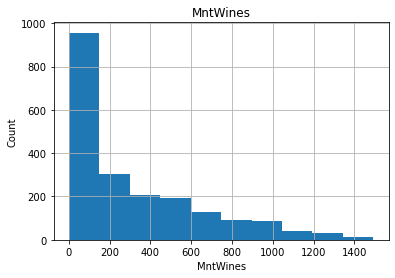

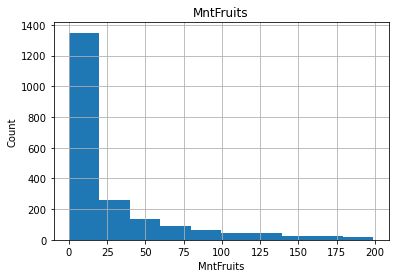

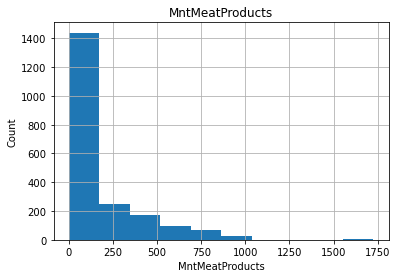

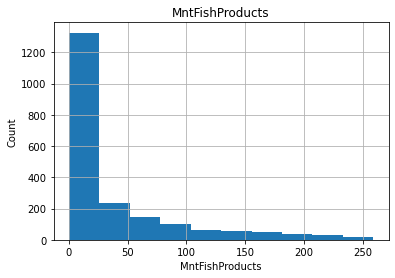

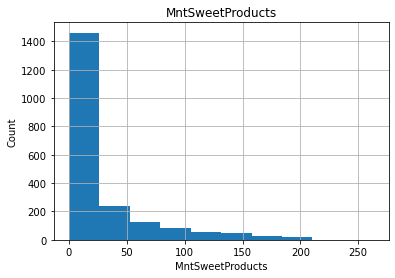

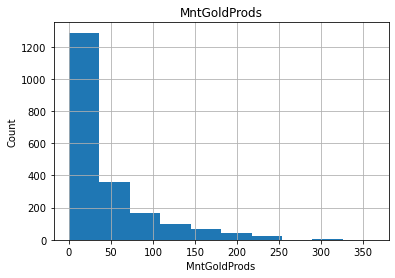

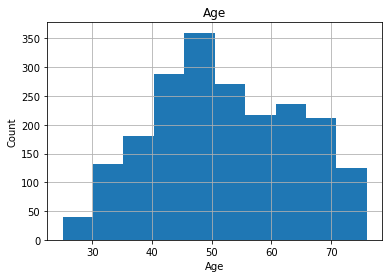

In [36]:
## Analysing the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    print()

# Statistics Summary


In [37]:
df.describe(include="number", percentiles=[0.01,0.05,0.50,0.75,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cust_Tenure,childhome
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,51830.423777,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,0.152089,52.129738,6.971331,0.954810
std,20642.990466,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.359195,11.664037,0.685749,0.748616
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,6.000000,0.000000
1%,7500.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,6.000000,0.000000
5%,19089.150000,3.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,6.000000,0.000000
50%,52054.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,7.000000,1.000000
75%,68242.500000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,7.000000,1.000000
90%,79800.900000,89.000000,820.600000,82.000000,503.600000,120.000000,89.000000,121.300000,5.000000,8.000000,7.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,2.000000
99%,94503.433000,98.000000,1285.000000,172.000000,922.720000,225.860000,178.430000,227.860000,10.000000,11.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,76.000000,8.000000,3.000000


In [38]:
# SKEWNESS in the numeric features
df.skew().sort_values(ascending=True)

Income                 -0.006044
Recency                 0.002125
Cust_Tenure             0.036582
Age                     0.086979
NumWebVisitsMonth       0.252635
childhome               0.407664
NumStorePurchases       0.701512
MntWines                1.174421
NumWebPurchases         1.426380
MntGoldProds            1.905061
MntFishProducts         1.930643
Response                1.939054
NumCatalogPurchases     1.950938
MntMeatProducts         2.104580
MntFruits               2.108112
MntSweetProducts        2.150130
NumDealsPurchases       2.439396
AcceptedCmp4            3.181702
AcceptedCmp3            3.274744
AcceptedCmp5            3.316462
AcceptedCmp1            3.511783
AcceptedCmp2            8.733717
Complain               10.002782
dtype: float64

# Correlation Check

In [39]:
# To understand the linear relationship between different variables
corr_matrix=df.corr()
corr_matrix

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cust_Tenure,childhome
Income,1.000000,0.001606,0.710162,0.525003,0.679201,0.539402,0.534331,0.393268,-0.121484,0.465164,0.682688,0.658822,-0.644446,-0.014259,0.218727,0.406651,0.337411,0.105826,-0.030125,0.167520,0.211602,-0.021544,-0.352169
Recency,0.001606,1.000000,0.011581,-0.010708,0.014214,-0.000718,0.020620,0.010132,0.005605,-0.011758,0.015053,-0.000200,-0.016980,-0.034050,0.023456,-0.002912,-0.023457,-0.009266,0.007340,-0.202877,0.020367,0.026455,0.028317
MntWines,0.710162,0.011581,1.000000,0.388175,0.554880,0.395760,0.380011,0.385986,0.014963,0.537243,0.626678,0.638452,-0.310833,0.064250,0.361078,0.465341,0.356954,0.199501,-0.037739,0.238926,0.168316,0.154713,-0.356582
MntFruits,0.525003,-0.010708,0.388175,1.000000,0.541054,0.593156,0.555291,0.397990,-0.134720,0.290716,0.486112,0.456825,-0.410645,0.012171,0.014509,0.219423,0.205511,-0.005047,-0.002205,0.130013,0.025979,0.064236,-0.397488
MntMeatProducts,0.679201,0.014214,0.554880,0.541054,1.000000,0.562618,0.516262,0.342998,-0.117584,0.284959,0.721638,0.471186,-0.530624,0.018130,0.090635,0.370764,0.315531,0.045759,-0.021833,0.236669,0.035149,0.083174,-0.503698
MntFishProducts,0.539402,-0.000718,0.395760,0.593156,0.562618,1.000000,0.579798,0.420316,-0.136341,0.290207,0.527883,0.463594,-0.437808,-0.010359,0.009584,0.193380,0.265339,0.003379,-0.018635,0.105880,0.044622,0.075000,-0.421750
MntSweetProducts,0.534331,0.020620,0.380011,0.555291,0.516262,0.579798,1.000000,0.375005,-0.118678,0.345140,0.484115,0.445538,-0.413380,-0.008164,0.027574,0.256205,0.249997,0.012978,-0.020849,0.118187,0.023390,0.084591,-0.382554
MntGoldProds,0.393268,0.010132,0.385986,0.397990,0.342998,0.420316,0.375005,1.000000,0.055141,0.424894,0.432276,0.374911,-0.233710,0.131741,0.017127,0.175827,0.161532,0.058630,-0.029033,0.153571,0.052771,0.152369,-0.261926
NumDealsPurchases,-0.121484,0.005605,0.014963,-0.134720,-0.117584,-0.136341,-0.118678,0.055141,1.000000,0.224414,0.002877,0.064507,0.347316,-0.022270,0.021998,-0.182225,-0.127094,-0.035429,-0.001997,-0.001504,0.058250,0.185723,0.428330
NumWebPurchases,0.465164,-0.011758,0.537243,0.290716,0.284959,0.290207,0.345140,0.424894,0.224414,1.000000,0.368290,0.490914,-0.049919,0.042712,0.161452,0.136782,0.156263,0.039565,-0.014119,0.145681,0.150095,0.172018,-0.156181


In [40]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# unstacking 'upper' correlation matrix and sorting it
upper=upper.unstack().sort_values(ascending=True)

# to view the highly positive correlated variables
high_correlation=upper[(upper>=0.75) & (upper<1) & (upper!='Nan')] # Threshold is greater than or equal  to 0.75 but less than 1 
print("The highly positively correlated variables and its value are:\n\n{}".format(high_correlation))

The highly positively correlated variables and its value are:

Series([], dtype: float64)


In [41]:
# moderate positive correlation
mild_correlation=upper[(upper>=0.5) & (upper<0.75) & (upper!='Nan')]
mild_correlation

NumStorePurchases    NumCatalogPurchases    0.515659
MntSweetProducts     MntMeatProducts        0.516262
MntFruits            Income                 0.525003
NumCatalogPurchases  MntFishProducts        0.527883
MntSweetProducts     Income                 0.534331
NumWebPurchases      MntWines               0.537243
MntFishProducts      Income                 0.539402
MntMeatProducts      MntFruits              0.541054
                     MntWines               0.554880
MntSweetProducts     MntFruits              0.555291
MntFishProducts      MntMeatProducts        0.562618
MntSweetProducts     MntFishProducts        0.579798
MntFishProducts      MntFruits              0.593156
NumCatalogPurchases  MntWines               0.626678
NumStorePurchases    MntWines               0.638452
                     Income                 0.658822
MntMeatProducts      Income                 0.679201
NumCatalogPurchases  Income                 0.682688
MntWines             Income                 0.

In [42]:
# high negative correlation
high_negative_correlation=upper[(upper <= -0.75) & (upper!='Nan')]
print("The highly negatively correlated variables and its value are:\n\n{}".format(high_negative_correlation))

The highly negatively correlated variables and its value are:

Series([], dtype: float64)


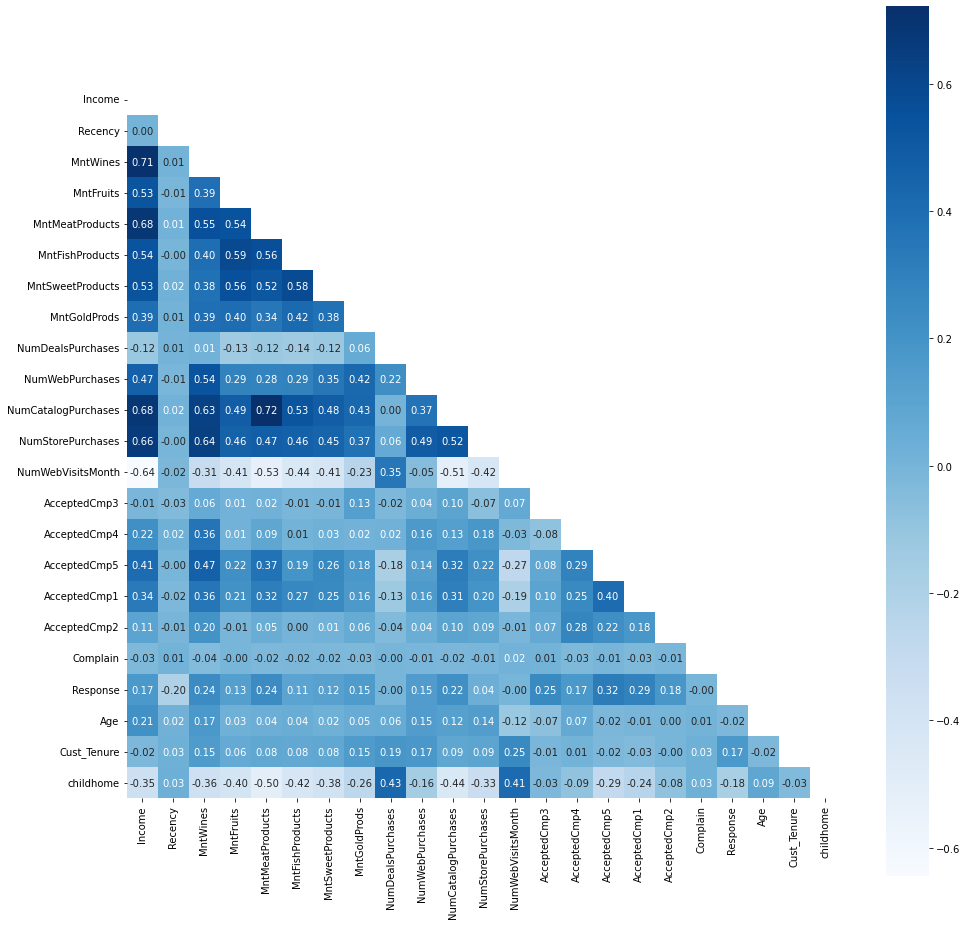

In [43]:
# Heat map
# shows the pearson correlation coefficient(r) between two variables
f, ax = plt.subplots(figsize=(16, 16))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, square=True, mask=matrix,fmt='.2f', cmap='Blues' );
plt.show()

## 'Total Campaigns Accepted' by each customer

In [44]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['Total_Campaigns_Accepted'].value_counts()


0    1627
1     304
2      77
3      40
4      10
Name: Total_Campaigns_Accepted, dtype: int64

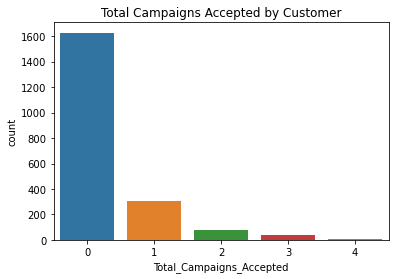

In [45]:
sns.countplot(df['Total_Campaigns_Accepted'])
plt.title('Total Campaigns Accepted by Customer')
plt.show()

## 'Total Amount Spent' by each customer

In [46]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [47]:
df['Total_Spend'].describe()

count    2058.000000
mean      606.240525
std       602.838230
min         5.000000
25%        69.000000
50%       396.500000
75%      1046.500000
max      2525.000000
Name: Total_Spend, dtype: float64

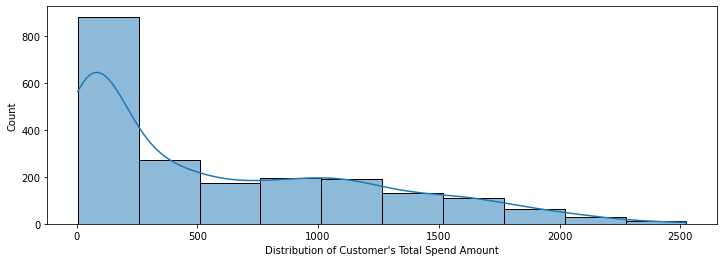

Note: The minimum amount spend by a customer is 5. 
 And, the maximum amount spend by a customer is 2525.


In [48]:
# To vizual the distribution 
plt.figure(figsize=(12,4))
sns.histplot(df['Total_Spend'],bins=10, kde=True)
plt.xlabel("Distribution of Customer's Total Spend Amount")
plt.show()
print("Note: The minimum amount spend by a customer is {}.".format(df['Total_Spend'].min()),"\n And, the maximum amount spend by a customer is {}.".format(df['Total_Spend'].max()) )


In [49]:
df.to_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\features_df",index=False )

                                    ***********************************************